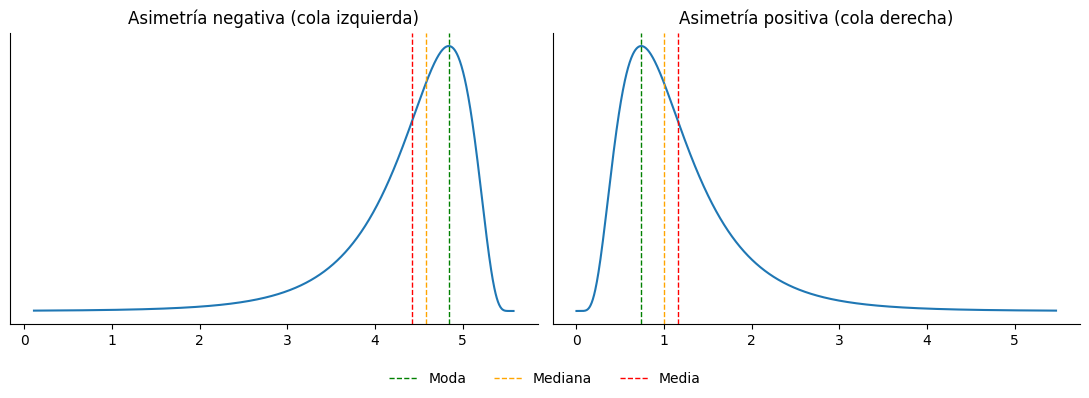

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# --- Helpers ---
def stats_for_lognormal(sigma, scale):
    dist = lognorm(s=sigma, scale=scale)
    mean = dist.mean()
    median = dist.median()
    mode = np.exp(np.log(scale) - sigma**2)  # moda lognormal
    std = dist.std()
    return dist, mean, median, mode, std

def plot_skew(ax, x, y, mean, median, mode, std, title):
    ax.plot(x, y)
    ax.axvline(mode, linestyle="--", linewidth=1, color="green", label="Moda")
    ax.axvline(median, linestyle="--", linewidth=1, color="orange", label="Mediana")
    ax.axvline(mean, linestyle="--", linewidth=1, color="red", label="Media")
    ax.set_title(title)
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# --- Base distribution: right-skew (positive skew) ---
sigma = 0.55
scale = 1.0
dist_pos, mean_p, median_p, mode_p, std_p = stats_for_lognormal(sigma, scale)

# Grid for pdf
x_pos = np.linspace(0.0001, dist_pos.ppf(0.999), 1200)
y_pos = dist_pos.pdf(x_pos)

# --- Left-skew (negative skew): reflect around a constant c ---
# If X is right-skew, then Y = c - X is left-skew.
# Choose c large enough so Y stays mostly positive in the visible range.
c = dist_pos.ppf(0.999) * 1.02
x_neg = np.linspace(c - x_pos.max(), c - x_pos.min(), 1200)
# y_neg is same shape as y_pos but mirrored
y_neg = y_pos[::-1]

# Stats for reflected variable Y = c - X
mean_n = c - mean_p
median_n = c - median_p
mode_n = c - mode_p
std_n = std_p  # reflection preserves std

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)

plot_skew(
    axes[0], x_neg, y_neg,
    mean_n, median_n, mode_n, std_n,
    "Asimetría negativa (cola izquierda)"
)

plot_skew(
    axes[1], x_pos, y_pos,
    mean_p, median_p, mode_p, std_p,
    "Asimetría positiva (cola derecha)"
)

# Legend once
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles[:4], labels[:4], loc="lower center", ncol=4, frameon=False)

plt.tight_layout(rect=(0, 0.08, 1, 1))
plt.show()


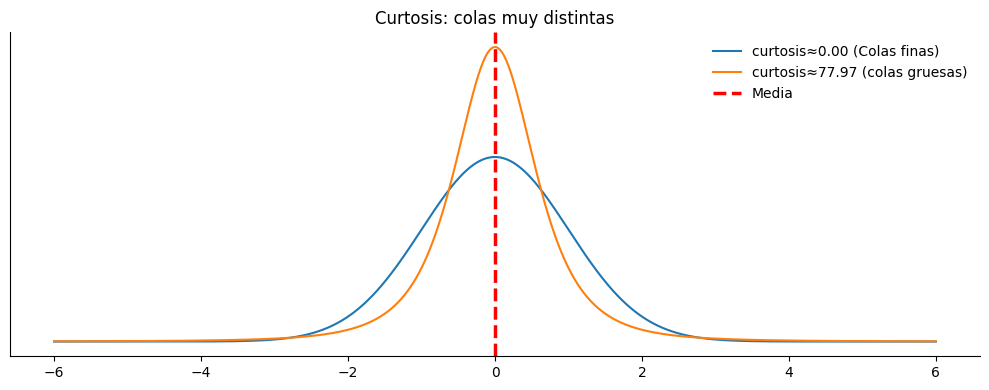

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, kurtosis

# ----------------------------
# Configuración: misma media y misma DE
# ----------------------------
mu = 0.0
sigma = 1.0

# Distribución "colas finas": Normal(0,1)
dist_thin = norm(loc=mu, scale=sigma)

# Distribución "colas gruesas": t(df) escalada para tener DE=1
df = 3  # colas bastante pesadas (ajustable: 5, 7, 10... menos pesado)
# La varianza de t(df) es df/(df-2) para df>2
scale_t = sigma / np.sqrt(df / (df - 2))
dist_fat = t(df=df, loc=mu, scale=scale_t)

# Grid para pdf
x = np.linspace(-6, 6, 1600)
y_thin = dist_thin.pdf(x)
y_fat = dist_fat.pdf(x)

# Estadísticos (para líneas verticales)
mean_thin = dist_thin.mean()
median_thin = dist_thin.median()
mode_thin = mu  # normal: modo=media=mu

mean_fat = dist_fat.mean()
median_fat = dist_fat.median()
mode_fat = mu   # t simétrica: modo=0

# Muestras para estimar curtosis (exceso) y mostrar números
rng = np.random.default_rng(7)
s_thin = dist_thin.rvs(size=200000, random_state=rng)
s_fat = dist_fat.rvs(size=200000, random_state=rng)

k_thin = kurtosis(s_thin, fisher=True, bias=False)  # exceso de curtosis
k_fat  = kurtosis(s_fat,  fisher=True, bias=False)

# ----------------------------
# Plot
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, y_thin, label=f"curtosis≈{k_thin:.2f} (Colas finas)")
ax.plot(x, y_fat,  label=f"curtosis≈{k_fat:.2f} (colas gruesas)")

# Líneas verticales (colores semánticos)
# Moda=verde, Mediana=naranja, Media=rojo
ax.axvline(mean_thin,   color="red",    linestyle="--", linewidth=2.5, label="Media")


ax.set_title("Curtosis: colas muy distintas")
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(frameon=False)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np

np.random.seed(42)

n = 400  # número de operaciones

# A) Tranquila (cola izquierda suave)
A = np.random.normal(loc=0.002, scale=0.005, size=n)
A[np.random.choice(n, 5, replace=False)] -= 0.03  # pérdidas moderadas raras

# B) Traicionera (cola izquierda brutal)
B = np.random.normal(loc=0.002, scale=0.004, size=n)
B[np.random.choice(n, 2, replace=False)] -= 0.15  # catástrofes

# C) Incómoda (cola derecha)
C = np.random.normal(loc=-0.001, scale=0.004, size=n)
C[np.random.choice(n, 6, replace=False)] += 0.20  # rescates enormes

# D) Ruido
D = np.random.normal(loc=0.0, scale=0.01, size=n)


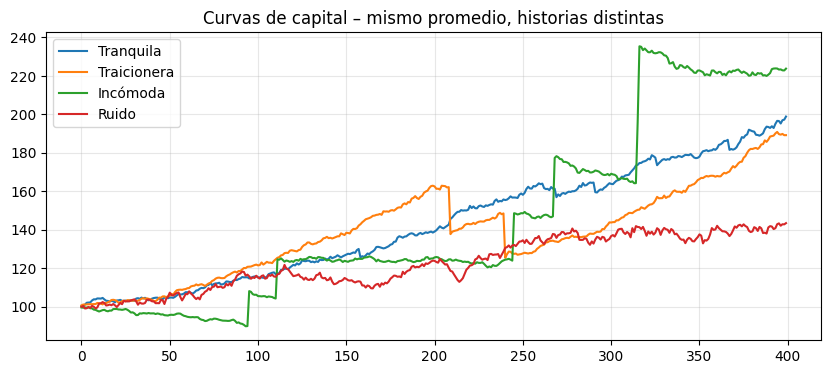

In [4]:
import matplotlib.pyplot as plt

def equity_curve(returns, capital=100):
    return capital * np.cumprod(1 + returns)

plt.figure(figsize=(10,4))
plt.plot(equity_curve(A), label="Tranquila")
plt.plot(equity_curve(B), label="Traicionera")
plt.plot(equity_curve(C), label="Incómoda")
plt.plot(equity_curve(D), label="Ruido")
plt.legend()
plt.title("Curvas de capital – mismo promedio, historias distintas")
plt.grid(alpha=0.3)
plt.show()


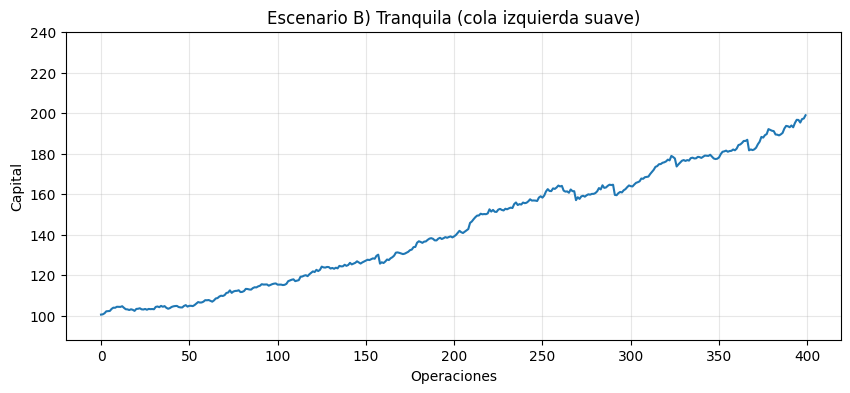

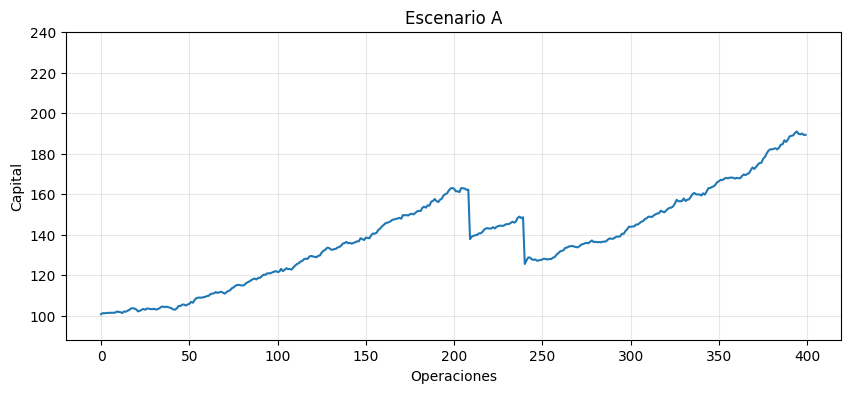

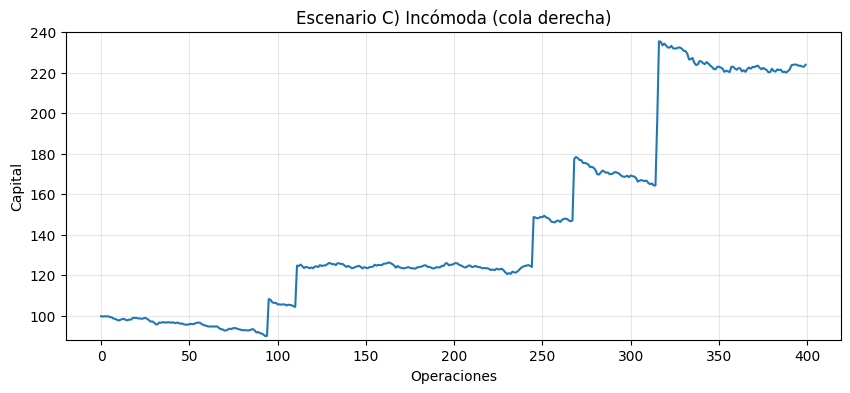

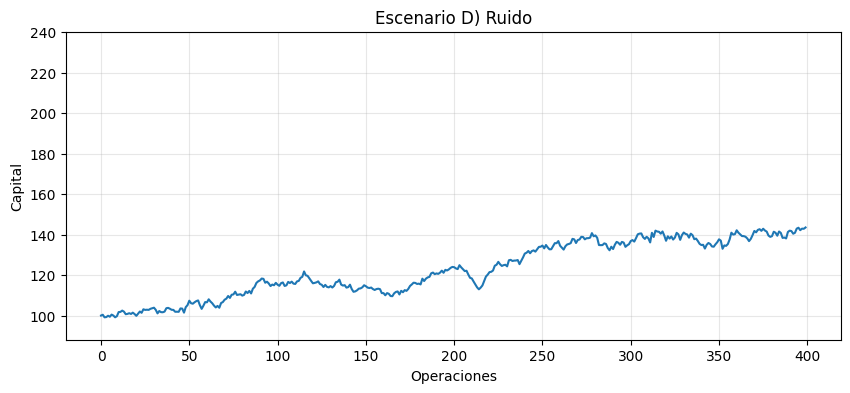

array([ 99.98169652, 100.37886842,  99.10602868,  99.22825523,
        99.87967008,  99.3894885 , 100.44523776,  99.97572223,
        99.11587017,  99.66778815, 101.69432708, 101.78112687,
       102.42734319, 101.90627765, 100.64099278, 100.80832418,
       101.13534635, 100.77337173, 101.40930866, 100.74601065,
        99.83719472, 100.89611087, 101.97100519, 101.32415915,
       103.06576996, 102.76986123, 102.85699246, 102.76992141,
       103.30818937, 103.58859   , 103.85580937, 102.79693538,
       101.06114507, 102.21542507, 101.65789513, 101.60804883,
       101.94010283, 103.60071689, 103.76788486, 103.35821178,
       102.81708567, 102.77867645, 101.84404338, 101.87345158,
       101.82045733, 103.49186757, 103.40534719, 101.41532353,
       104.12667333, 105.12299246, 107.31201978, 106.07007632,
       105.83478449, 106.54853559, 107.12005274, 107.44884457,
       105.08538827, 103.28586462, 104.85324838, 106.63085647,
       106.51713329, 107.99817677, 106.89310944, 106.04

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def equity_curve(returns, capital=100):
    return capital * np.cumprod(1 + returns)

def plot_equity(returns, title, capital=100, ylim=None):
    eq = equity_curve(returns, capital=capital)
    plt.figure(figsize=(10,4))
    plt.plot(eq)
    plt.title(title)
    plt.xlabel("Operaciones")
    plt.ylabel("Capital")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.grid(alpha=0.3)
    plt.show()
    return eq

# Primero calculás las curvas para decidir una escala común
eqA = equity_curve(A); eqB = equity_curve(B); eqC = equity_curve(C); eqD = equity_curve(D)
ymin = min(eqA.min(), eqB.min(), eqC.min(), eqD.min())
ymax = max(eqA.max(), eqB.max(), eqC.max(), eqD.max())
common_ylim = (ymin*0.98, ymax*1.02)

plot_equity(A, "Escenario B) Tranquila (cola izquierda suave)", ylim=common_ylim)
plot_equity(B, "Escenario A", ylim=common_ylim)
plot_equity(C, "Escenario C) Incómoda (cola derecha)", ylim=common_ylim)
plot_equity(D, "Escenario D) Ruido", ylim=common_ylim)


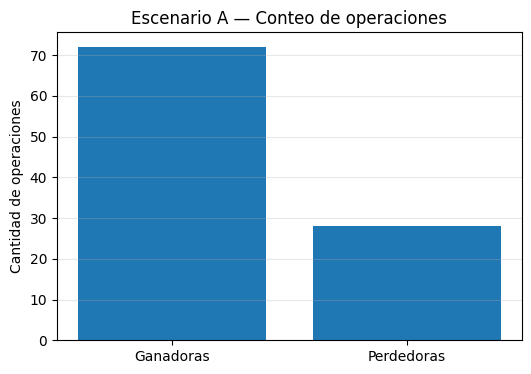

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_win_loss_count(returns, title="Operaciones ganadoras vs perdedoras"):
    wins = np.sum(returns > 0) / n * 100
    losses = np.sum(returns <= 0) / n * 100

    plt.figure(figsize=(6,4))
    plt.bar(["Ganadoras", "Perdedoras"], [wins, losses])
    plt.title(title)
    plt.ylabel("Cantidad de operaciones")
    plt.grid(axis="y", alpha=0.3)
    plt.show()

# Ejemplo:
plot_win_loss_count(B, "Escenario A — Conteo de operaciones")


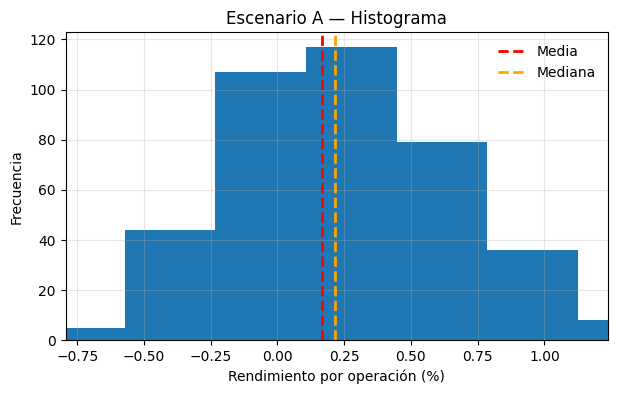

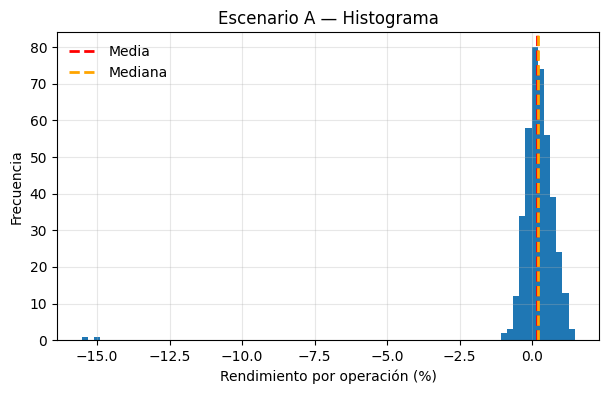

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def hist_with_lines(r_pct, title, bins=50, xlim=None):
    plt.figure(figsize=(7,4))
    plt.hist(r_pct, bins=bins)
    plt.title(title)
    plt.xlabel("Rendimiento por operación (%)")
    plt.ylabel("Frecuencia")
    plt.axvline(np.mean(r_pct), linestyle="--", linewidth=2, color="red", label="Media")
    plt.axvline(np.median(r_pct), linestyle="--", linewidth=2, color="orange", label="Mediana")
    if xlim is not None:
        plt.xlim(*xlim)
    plt.grid(alpha=0.3)
    plt.legend(frameon=False)
    plt.show()

r_pct = np.asarray(B) * 100  # o tu array de retornos

# Vista A: zoom al cuerpo (sin que el outlier arruine la escala)
lo, hi = np.percentile(r_pct, [1, 99])
hist_with_lines(r_pct, "Escenario A — Histograma", bins=50, xlim=(lo, hi))

# Vista B: cola completa (para que se vea el extremo)
hist_with_lines(r_pct, "Escenario A — Histograma", bins=80)


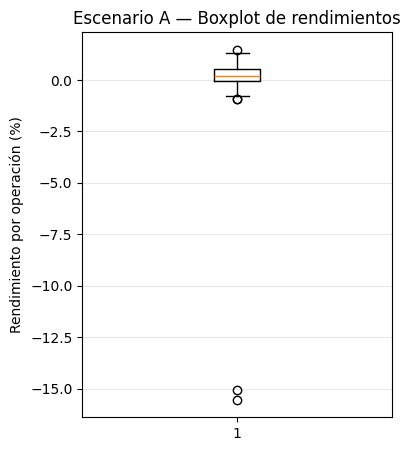

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boxplot(returns, title="Boxplot de rendimientos por operación"):
    r_pct = np.asarray(returns) * 100  # pasar a porcentaje

    plt.figure(figsize=(4,5))
    plt.boxplot(r_pct, vert=True)
    plt.title(title)
    plt.ylabel("Rendimiento por operación (%)")
    plt.grid(axis="y", alpha=0.3)
    plt.show()

# Ejemplo:
plot_boxplot(B, "Escenario A — Boxplot de rendimientos")


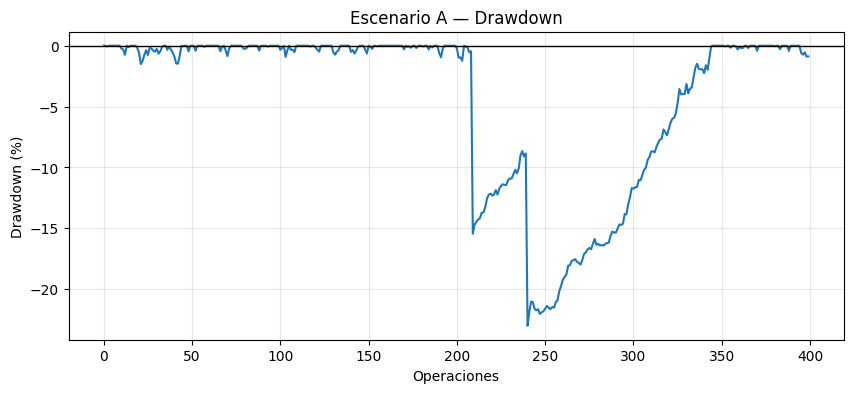

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def equity_curve(returns, capital=100):
    returns = np.asarray(returns)
    return capital * np.cumprod(1 + returns)

def drawdown_curve(returns, capital=100):
    equity = equity_curve(returns, capital)
    running_max = np.maximum.accumulate(equity)
    drawdown = (equity - running_max) / running_max
    return drawdown * 100  # en porcentaje

def plot_drawdown(returns, title="Drawdown de la estrategia", capital=100):
    dd = drawdown_curve(returns, capital)

    plt.figure(figsize=(10,4))
    plt.plot(dd)
    plt.axhline(0, color="black", linewidth=1)
    plt.title(title)
    plt.xlabel("Operaciones")
    plt.ylabel("Drawdown (%)")
    plt.grid(alpha=0.3)
    plt.show()

# Ejemplo:
plot_drawdown(B, "Escenario A — Drawdown")
